In [1]:
from segmentandoDatasets import segmentando_datasets

segmentando_datasets(1000,1000,1000)



DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint



2024-09-03 13:49:43.432105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-03 13:49:43.446247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-03 13:49:43.450406: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-03 13:49:43.460165: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-03 13:49:44.891632: W tensorflow/compiler/tf2

In [3]:
from preprocessamento import *

csv_file = 'Datasets_csv/df_PUC.csv'
train, teste, val, _, _, _ = preprocessamento(csv_file, 0.6, 0.2, 0.2, True)

Found 600 validated image filenames.
Found 200 validated image filenames.
Found 200 validated image filenames.


In [4]:
print(train.dtype)

print(train)

float32


In [5]:
"""x_train = next(train)

diff = x_train[0][0] - x_train[1][0]
print(np.sum(diff))"""

'x_train = next(train)\n\ndiff = x_train[0][0] - x_train[1][0]\nprint(np.sum(diff))'

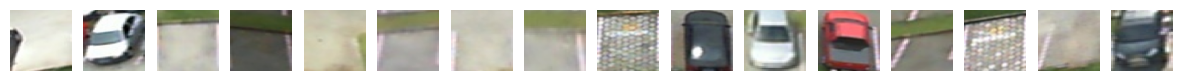

In [6]:
images, labels = next(train)

fig, axes = plt.subplots(1, 16, figsize=(15, 5))

for i in range(16):
    axes[i].imshow(np.clip(images[i], 0, 255).astype('uint8'))
    axes[i].axis('off') 

plt.show()

In [7]:
class NormalizedDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, data_iterator):
        self.data_iterator = data_iterator

    def __len__(self):
        return len(self.data_iterator)

    def __getitem__(self, idx):
        batch = self.data_iterator[idx]
        if isinstance(batch, tuple):
            return (batch[0] / 255.0, batch[0] / 255.0)  # Normalize input and target
        else:
            return batch / 255.0

In [8]:
class Autoencoder(Model):
    def __init__(self, input_shape=(256, 256, 3)):
        super(Autoencoder, self).__init__()
        self.input_shape = input_shape

        self.encoder = tf.keras.Sequential([
            layers.Input(shape=input_shape),
            layers.Conv2D(32, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(64, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(128, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(256, (3, 3), activation='relu', padding='same', strides=2)
        ])

        self.decoder = tf.keras.Sequential([
            layers.Conv2DTranspose(128, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(64, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(32, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(3, kernel_size=3, strides=2, activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [9]:
def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 10:
        lr *= 0.1
    return lr

In [10]:
autoencoder = Autoencoder()

I0000 00:00:1725382195.601424    9312 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725382196.321205    9312 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725382196.321363    9312 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1725382196.322467    9312 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [11]:
#autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                    loss='mse')

In [12]:
from tensorflow.keras import layers, Model, callbacks


#checkpoint_path = 'weights_parciais/weights-improvement-{epoch:02d}-{loss:.2f}.weights.h5'
"""cp_callback = ModelCheckpoint(filepath=checkpoint_path, 
                                  save_weights_only=True, 
                                  monitor='loss',
                                  mode='max', 
                                  save_best_only=True, 
                                  verbose=1)"""

cp_callback = callbacks.ModelCheckpoint(filepath='best_model.keras',
                                        save_best_only=True,
                                        monitor='val_loss')
early_stopping = callbacks.EarlyStopping(monitor='val_loss',
                                         patience=10,
                                         restore_best_weights=True)
lr_scheduler = callbacks.LearningRateScheduler(lr_schedule)



In [13]:
train_gen = NormalizedDataGenerator(train)
val_gen = NormalizedDataGenerator(val)

In [14]:
history = autoencoder.fit(train_gen,
                          epochs=100,
                          validation_data=val_gen,
                          callbacks=[cp_callback, early_stopping, lr_scheduler],
                          verbose=1)

Epoch 1/100


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1725382200.406111    9436 service.cc:146] XLA service 0x7125a8010450 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725382200.406129    9436 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-03 13:50:00.466573: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-03 13:50:00.723074: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 

 3/19 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0536

I0000 00:00:1725382209.240526    9436 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 8/19 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0552

E0000 00:00:1725382211.598221    9439 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725382211.748050    9439 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - loss: 0.0522

E0000 00:00:1725382218.049501    9439 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1725382218.189392    9439 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


19/19 ━━━━━━━━━━━━━━━━━━━━ 21s 517ms/step - loss: 0.0520 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0381 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0273 - val_loss: 0.0204 - learning_rate: 0.0010
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - loss: 0.0206 - val_loss: 0.0175 - learning_rate: 0.0010
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 0.0177 - val_loss: 0.0165 - learning_rate: 0.0010
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0173 - val_loss: 0.0155 - learning_rate: 0.0010
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0160 - val_loss: 0.0081 - learning_rate: 0.0010
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - loss: 0.0069 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - loss: 0.0037 - val_loss: 0.0029 - learning_rate: 0.0010
Epoch 10/100
19/19 ━

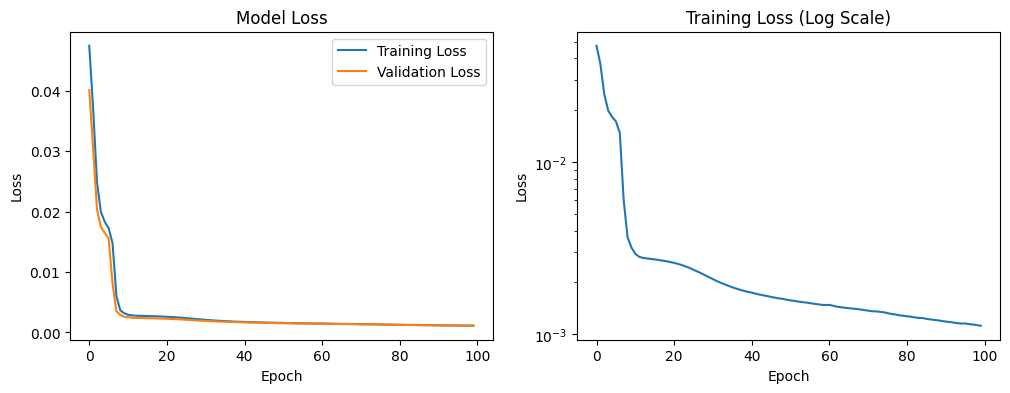

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Training Loss (Log Scale)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')
plt.show()

In [16]:
autoencoder.save('Modelos_keras/Autoencoder2.keras')
autoencoder.save_weights('weights_finais/Autoencoder2.weights.h5')

In [17]:
autoencoder.load_weights('weights_finais/Autoencoder2.weights.h5')

In [18]:
encoded_imgs = autoencoder.encoder(train[0])
decoded_imgs = autoencoder.decoder(encoded_imgs)

W0000 00:00:1725382410.025791    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.112998    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.114631    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.116320    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.119452    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.121429    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.123818    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.125638    9312 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1725382410.127526    9312 gp

In [19]:
print(encoded_imgs.shape)
decoded_imgs.shape

(32, 16, 16, 256)


TensorShape([32, 256, 256, 3])

In [20]:
#x_test = next(teste)

In [21]:
print(np.unique(decoded_imgs[0]))


[1.]


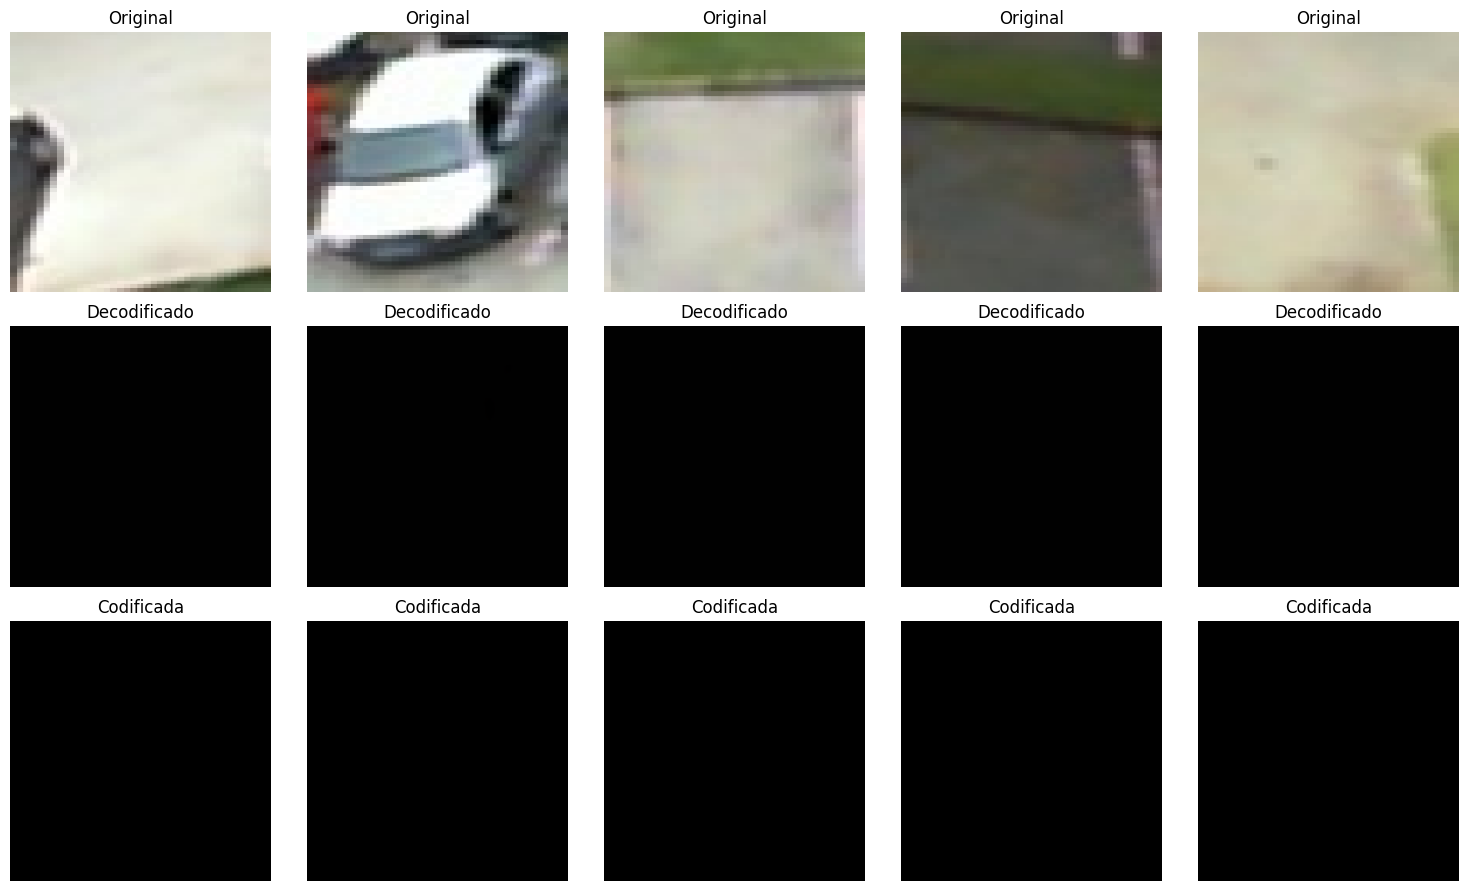

In [22]:
import matplotlib.pyplot as plt
import numpy as np

input_imgs, _ = train[0]  # Extraia as imagens

num_imgs = min(encoded_imgs.shape[0], 5)  # Por exemplo, visualize no máximo 5 imagens
num_channels = encoded_imgs.shape[-1]  # Número de canais
num_channels_to_show = min(num_channels, 10)  # Número de canais a mostrar por imagem

fig, axes = plt.subplots(3, num_imgs, figsize=(15, 9))

for i in range(num_imgs):
    axes[0, i].imshow(np.clip(input_imgs[i], 0, 255).astype('uint8'))
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

for i in range(num_imgs):
    axes[1, i].imshow(np.clip(decoded_imgs[i], 0, 255).astype('uint8'))
    axes[1, i].axis('off')
    axes[1, i].set_title('Decodificado')

for i in range(num_imgs):
    encoded_img = encoded_imgs[i]
    for j in range(num_channels_to_show):
        axes[2, i].imshow(encoded_img[:, :, j], cmap='gray')
        axes[2, i].axis('off')
        axes[2, i].set_title(f'Codificada')

plt.tight_layout()
plt.show()


In [23]:
#UFPR04, _ = preprocessamento_dataframe_unico("Datasets_csv/df_UFPR04.csv", True)

In [24]:
"""x_UFPR04, _ = next(UFPR04)

x_UFPR04 = x_UFPR04.astype('float32')/255.

print(x_UFPR04.shape)"""

"x_UFPR04, _ = next(UFPR04)\n\nx_UFPR04 = x_UFPR04.astype('float32')/255.\n\nprint(x_UFPR04.shape)"